In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
dataset.columns = ['gender', 'age_band', 'head_size', 'brain_weight']

In [7]:
X = dataset['head_size'].values
y = dataset['brain_weight'].values

In [8]:
x_mean = np.mean(X)
y_mean = np.mean(y)

In [9]:
n = len(X)

![](https://cdn-images-1.medium.com/max/800/1*O2xXpYS7A3VlLXqT6SNMLg.png)

In [10]:
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

In [11]:
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

In [12]:
print(b1, b0) ##coefficient

0.26342933948939945 325.57342104944223


Brain weights =  325.57342104944223 + 0.26342933948939945 * Head size

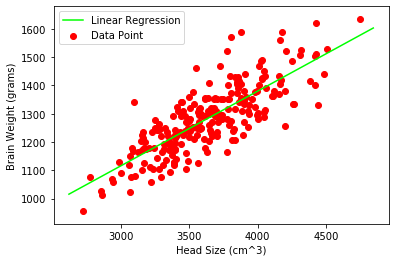

In [13]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [14]:
## RMSE
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [41]:
## R^2
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

[0.63931172]


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
X = dataset['head_size'].values
y = dataset['brain_weight'].values
X = X.reshape(237,1)

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
model.score(X,y)

0.639311719957